<a href="https://colab.research.google.com/github/21-10-4/zxing/blob/master/pytorch_tutorials%E6%A1%88%E4%BE%8B%E5%AD%A6%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

# 1、basic autograd example1

In [4]:
# 创建tensors 必须为浮点数
x = torch.tensor(1., requires_grad=False)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# 创建计算图
y = w*x+b
# 计算梯度
y.backward()

# 输出梯度
print(x.grad)
print(w.grad)
print(b.grad)

None
tensor(1.)
tensor(1.)


# 2、Basic autograd example 2

In [5]:
# 创建特定shape的tensors
x = torch.randn(10,3)
y = torch.randn(10,2)

# 创建全连接层
linear = nn.Linear(3,2)
print('w：', linear.weight)
print('b: ', linear.bias)


# 创建损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# 前向
pred = linear(x)

# 计算损失
loss = criterion(pred, y)
print('loss: ',loss.item())

# 反向传播
loss.backward()

# 输出梯度
print('dL/dw: ',linear.weight.grad)
print('dL/db: ',linear.bias.grad)

# 更新参数
optimizer.step()

### 也可以使用linear.weight.data.sub_(0.01 * linear.weight.grad.data)
### linear.bias.data.sub_(0.01 * linear.bias.grad.data)

pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w： Parameter containing:
tensor([[ 0.0104,  0.1677, -0.4109],
        [-0.4332,  0.4909,  0.3027]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.3178, -0.5488], requires_grad=True)
loss:  1.712965965270996
dL/dw:  tensor([[ 0.1483,  0.1657, -0.2607],
        [ 0.0925,  0.3491,  0.3323]])
dL/db:  tensor([-0.1541, -0.8583])
loss after 1 step optimization:  1.701831579208374


# 3、Loading data from numpy

In [6]:
# 创建numpy array
x = np.array([[1,2],[3,4]])

# 转为torch tensor
y = torch.from_numpy(x)
print('y:',y)

# 将tensor转为numpy
z = y.numpy()
print('z:',z)

y: tensor([[1, 2],
        [3, 4]])
z: [[1 2]
 [3 4]]


# 4、input pipeline

In [ ]:
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',train=True,transform=transforms.ToTensor(),download=True)

In [ ]:
train_dataset

In [14]:
image, label = train_dataset[49999] # 根据索引取数据 __getitem__方法实现
print(image.shape)

torch.Size([3, 32, 32])


In [15]:
print(label)

1


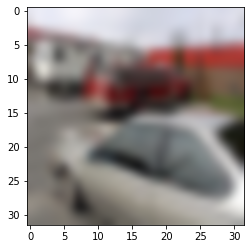

In [17]:
# 尝试输出图像
import matplotlib.pyplot as plt
plt.imshow(transforms.ToPILImage()(image), interpolation="bicubic")
transforms.ToPILImage()(image).show() # Alternatively

## 补充：尝试将图像tensor数据用opencv显示
> 我们知道opencv支持的图像数据是numpy格式，数据类型为uint8，而且像素值分布在[0,255]之间。 但是tensor的像素值并不是分布在[0,255]，且数据类型为float32,所以需要做一下normalize和数据变换，将图像数据扩展到[0,255]。还有一点不同的是tensor(3,982, 814)、numpy(982, 814, 3)存储的数据维度顺序不同。
原文链接：https://blog.csdn.net/qq_40859802/article/details/103903807

In [18]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2

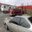

In [27]:
from google.colab.patches import cv2_imshow
imgcv = image.numpy() # 将tensor数据转为numpy数据
maxValue = imgcv.max()
imgcv = imgcv*255/maxValue # 将图像扩展到[0,255]
imgcv = np.uint8(imgcv)
imgcv = imgcv.transpose(1,2,0)
imgcv = cv2.cvtColor(imgcv, cv2.COLOR_RGB2BGR)# opencv颜色通道顺寻为BGR
cv2_imshow(imgcv)

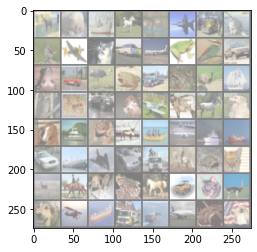

In [32]:
# Data loader 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)

# load data from files
data_iter = iter(train_loader)
images, labels = next(data_iter)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
# Actual usage of the data loader is as below:
#for images, 
